# 비슷한 연예인 사진 찾기

[(134, 562, 455, 241)]


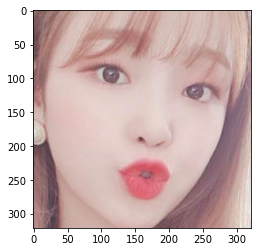

In [18]:
import face_recognition
import os
import numpy as np
from PIL import Image
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/승희.jpeg' 
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/embed/' 
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [7]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    # print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
    %matplotlib inline
    import matplotlib.pyplot as plt
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [4]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/'
image_file = os.path.join(dir_path, '승희.jpeg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(len(embedding[0]))

[(134, 562, 455, 241)]
128


In [54]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    a = 0
    for file in file_list:
        image_file = os.path.join(dir_path,file)
        print(file)
        face = get_gropped_face(image_file)
        embedimg = Image.fromarray(face)
        embedimg.save(path_to_save + os.path.splitext(file)[0], format = 'jpeg' )
        embedding = get_face_embedding(face)
        if len(embedding) != 0:
           embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        a += 1
        # print(file)
        print(a)
        # if len(embedding) != 0:
        #     embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [6]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [55]:
embedding_dict = get_face_embedding_dict(dir_path)



잇지예지.jpeg
1
정수빈.jpg
2
슬리피.jpg
3
찬열.jpeg
4
슈가.jpg
5
이광수.jpg
6
biden.jpg
7
유지태.jpg
8
제이크 질렌할.jpeg
9
제이홉.jpg
10
제프리 힌턴.jpg
11
이경규.jpeg
12
도아.jpeg
13
아린.jpg
14
이준혁.jpeg
15
이성민.jpg
16
대도서관.jpeg
17
이대형.jpg
18
박정민.jpg
19
김학범.jpg
20
김C.jpeg
21
이천수.jpg
22
잇섭.jpg
23
아이즈원조유리.jpeg
24
수호.jpg
25
이동국.jpeg
26
지수.jpg
27
장원준.jpeg
28
최양락.jpg
29
문별.jpg
30
장원영.jpeg
31
크리스 햄스워스.jpg
32
박재범.jpg
33
개리.jpg
34
김희철.jpg
35
비니.jpg
36
박찬욱.jpeg
37
디오.jpeg
38
온앤오프효진.jpg
39
켄 정.jpeg
40
나인뮤지스경리.jpg
41
전소미.jpg
42
레인보우재경.jpg
43
태양.jpeg
44
박나래.jpeg
45
카이.jpg
46
러블리즈지수.jpeg
47
잇지유나.jpg
48
성시경.jpg
49
노무현.jpeg
50
민니.jpg
51
미미.jpg
52
문재인.jpeg
53
박진영.jpg
54
제이콥 배털론.jpg
55
슬기.jpg
56
하정우.jpg
57
류진.jpg
58
박해일.jpeg
59
김래원.jpeg
60
노홍철.jpeg
61
박항서.jpg
62
지민(BTS).jpg
63
여자아이들수진.jpeg
64
이희준.jpg
65
김민재.jpeg
66
RM.jpg
67
홍구.jpg
68
옥냥이.jpeg
69
주호민.jpeg
70
방시혁.jpeg
71
케이.jpg
72
딕헌터.jpeg
73
이종석.jpeg
74
도지한.jpg
75
성룡.jpg
76
서현진.jpg
77
길.jpg
78
화사.jpg
79
트와이스모모.jpeg
80
우기.jpg
81
이제훈.jpeg
82
조이.jpg
83
첸.jpg
84
신비.jpg
85
숀 코네리.jpg
86
이승철.jpeg
8

In [9]:
get_distance('승희','길')

0.6740029586392219

In [10]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [62]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}),거리({})'.format(i,
                                               sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))
            ims = Image.open(path_to_save + sorted_faces[i][0])
            plt.imshow(ims)
            plt.show

순위 1 : 이름(우기),거리(0.32746712279860285)
순위 2 : 이름(사쿠라),거리(0.35478108023475347)
순위 3 : 이름(김고은),거리(0.36172963066296293)
순위 4 : 이름(유아),거리(0.36563978270231645)
순위 5 : 이름(강미나),거리(0.3670760127222913)


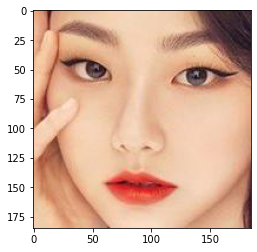

In [63]:
get_nearest_face('승희')